      Año      Fecha         Mes  República  Región I  Región II  Región III  \
0    2011 2011-04-01       Abril     103.17    102.66     104.76      103.01   
1    2011 2011-05-01        Mayo     103.68    103.10     104.95      103.25   
2    2011 2011-06-01       Junio     104.23    103.11     106.93      103.88   
3    2011 2011-07-01       Julio     105.22    103.89     109.09      104.84   
4    2011 2011-08-01      Agosto     105.85    104.29     110.01      105.35   
..    ...        ...         ...        ...       ...        ...         ...   
146  2023 2023-06-01       Junio     169.87    140.99     257.91      159.97   
147  2023 2023-07-01       Julio     171.06    141.53     264.64      161.34   
148  2023 2023-08-01      Agosto     172.13    142.00     266.53      162.08   
149  2023 2023-09-01  Septiembre     173.10    142.38     265.10      162.84   
150  2023 2023-10-01     Octubre     175.29    143.28     265.14      164.58   

     Región IV  Región V  Región VI  Re

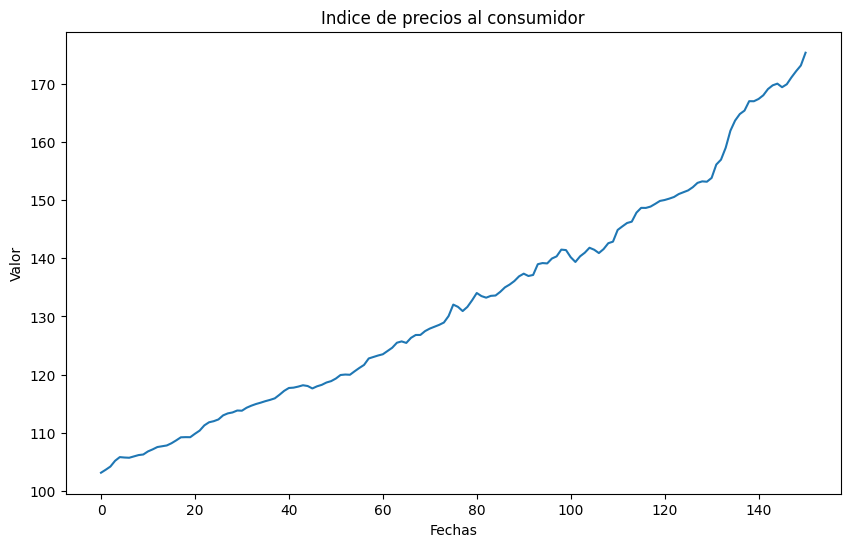

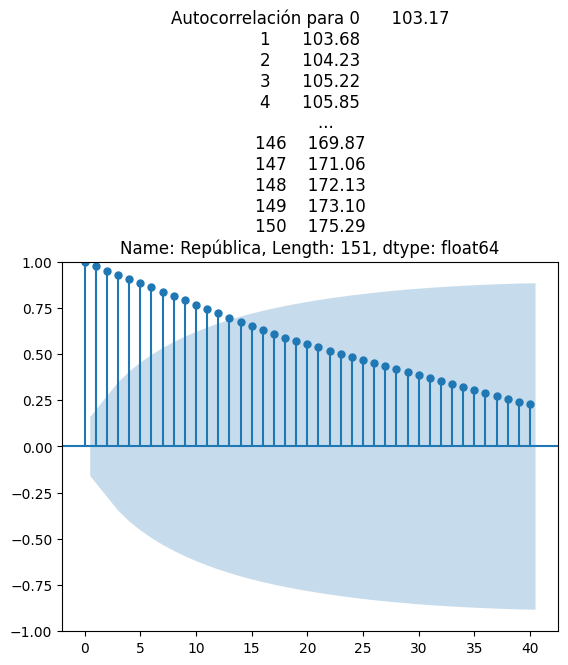

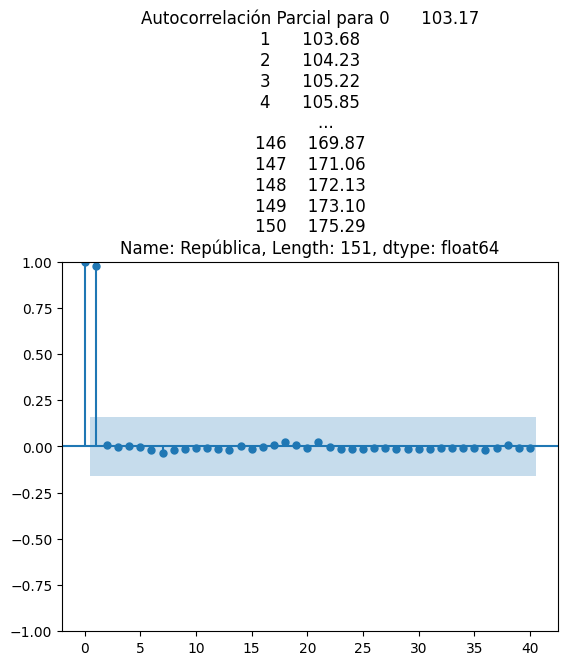

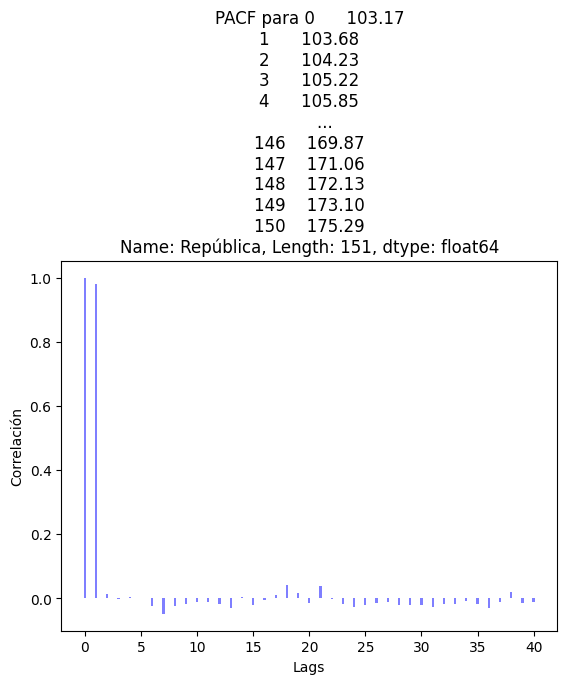

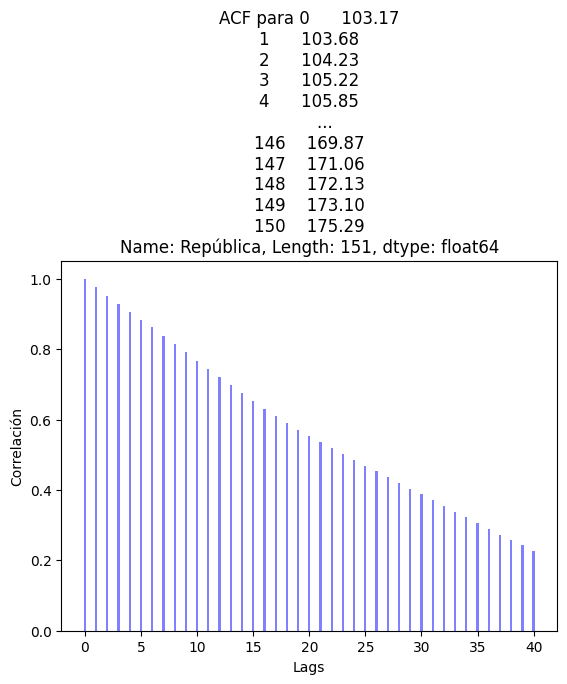

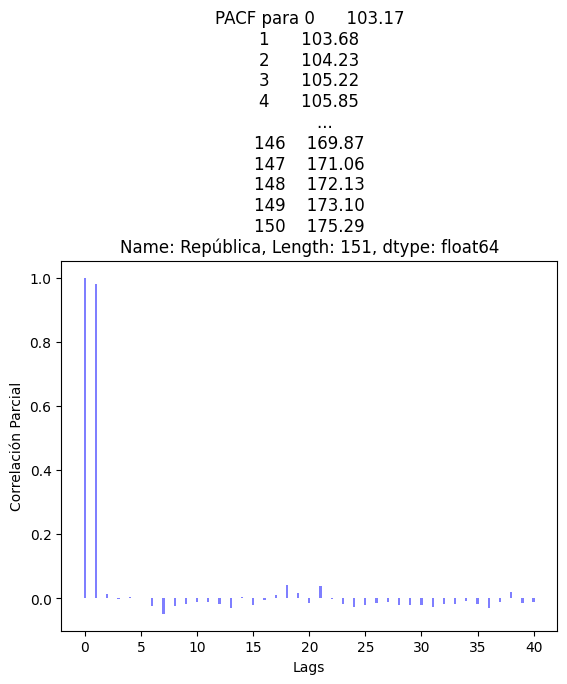

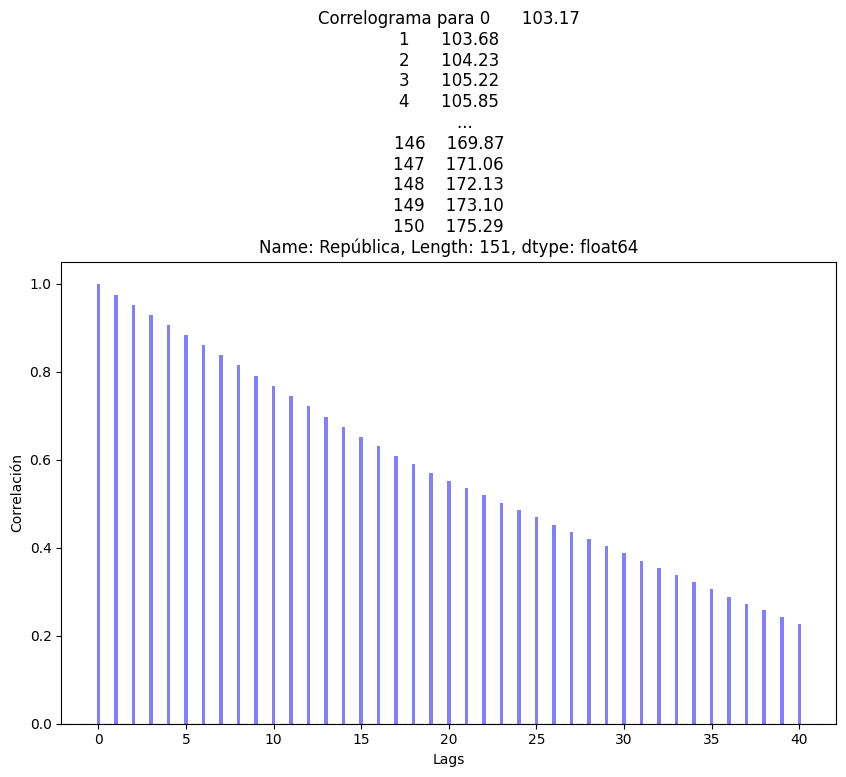

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

hoja = "Datos"
rango = "A:K"
ruta = 'C:/Users/tecnico_ine/Documents/Muestreo/ipc.xlsx'
datos = pd.read_excel(ruta, sheet_name=hoja, skiprows=3, usecols=rango)
print(datos)
print(datos.columns)

fechas = pd.date_range(start='2011-04-01', end='2023-10-31', freq='MS')
valores = datos["República"]
print(valores)

serie = pd.Series(valores, index=fechas)

#serie.plot(figsize=(10,6))
#plt.title("Indice de precios al consumidor")
#plt.xlabel("Fecha")
#plt.ylabel("Valor")
#plt.show()

print(datos.head())
print(datos["República"].head())

valores.plot(figsize=(10,6))
plt.title("Indice de precios al consumidor")
plt.xlabel("Fechas")
plt.ylabel("Valor")
plt.show()

retrasos = 40

# Realiza la gráfica de autocorrelación
sm.graphics.tsa.plot_acf(valores, lags=retrasos)  # Ajusta el número de lags según tus necesidades
plt.title(f"Autocorrelación para {valores}")
plt.show()

# Realiza la gráfica de autocorrelación parcial
sm.graphics.tsa.plot_pacf(valores, lags=retrasos)  # Ajusta el número de lags según tus necesidades
plt.title(f"Autocorrelación Parcial para {valores}")
plt.show()


# Calcula la PACF
pacf_vals, pacf_conf_int = sm.tsa.pacf(valores, nlags=retrasos, alpha=0.05)

# Visualiza la PACF
plt.bar(range(len(pacf_vals)), pacf_vals, width=0.2, alpha=0.5, color='b', label='PACF')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'PACF para {valores}')
plt.show()

# Calcula la ACF
acf_vals, acf_conf_int = sm.tsa.acf(valores, nlags=retrasos, fft=False, alpha=0.05)

# Visualiza la ACF
plt.bar(range(len(acf_vals)), acf_vals, width=0.2, alpha=0.5, color='b', label='ACF')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'ACF para {valores}')
plt.show()

# Calcula la PACF
pacf_vals, pacf_conf_int = sm.tsa.pacf(valores, nlags=retrasos, alpha=0.05)

# Visualiza la PACF
plt.bar(range(len(pacf_vals)), pacf_vals, width=0.2, alpha=0.5, color='b', label='PACF')
plt.xlabel('Lags')
plt.ylabel('Correlación Parcial')
plt.title(f'PACF para {valores}')
plt.show()


# Calcula la autocorrelación
acf_vals, acf_conf_int = sm.tsa.acf(valores, nlags=retrasos, fft=False, alpha=0.05)

# Visualiza el correlograma
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_vals)), acf_vals, width=0.2, alpha=0.5, color='b', label='ACF')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Línea horizontal en y=0
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'Correlograma para {valores}')
plt.show()


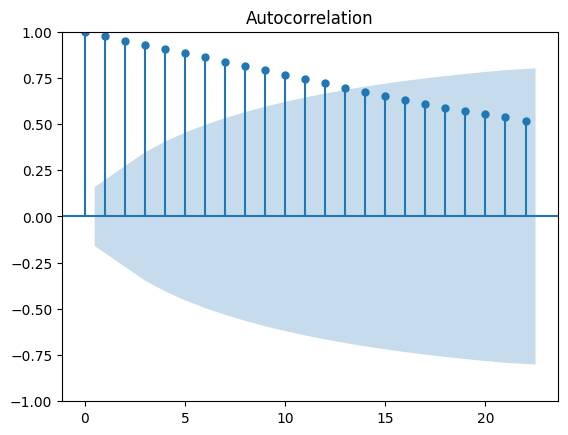

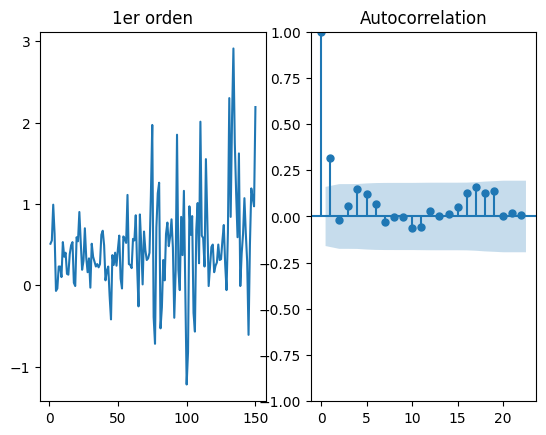

p_value:  1.0
p_value:  2.449729566995302e-06
p_value:  2.603346445972308e-17


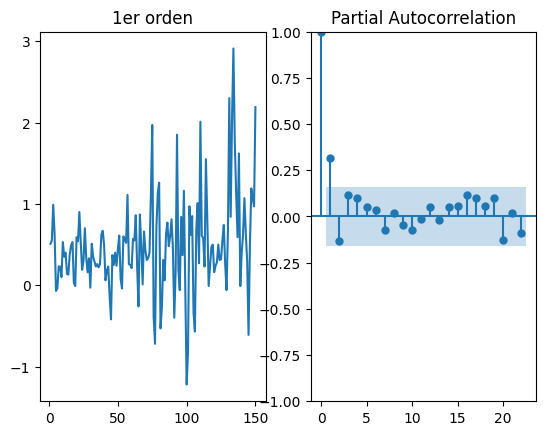

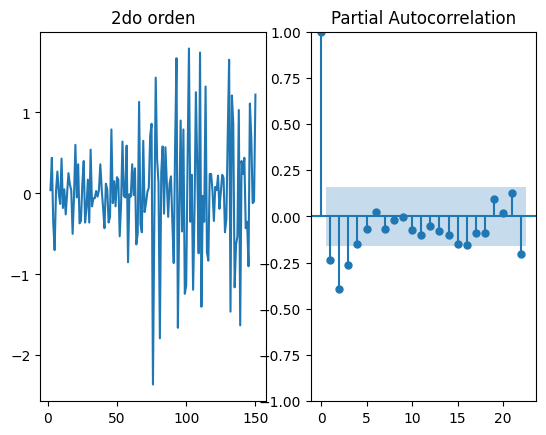

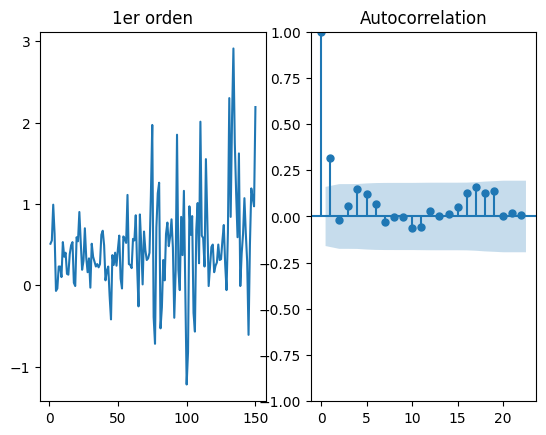

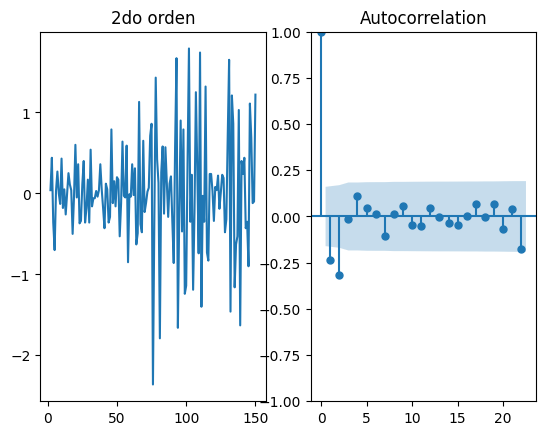

                               SARIMAX Results                                
Dep. Variable:              República   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.274
Date:                Wed, 22 Nov 2023   AIC                            268.548
Time:                        10:40:14   BIC                            277.580
Sample:                             0   HQIC                           272.217
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.006    157.258      0.000       0.986       1.010
ma.L1         -0.9310      0.033    -28.478      0.000      -0.995      -0.867
sigma2         0.3320      0.027     12.347      0.0

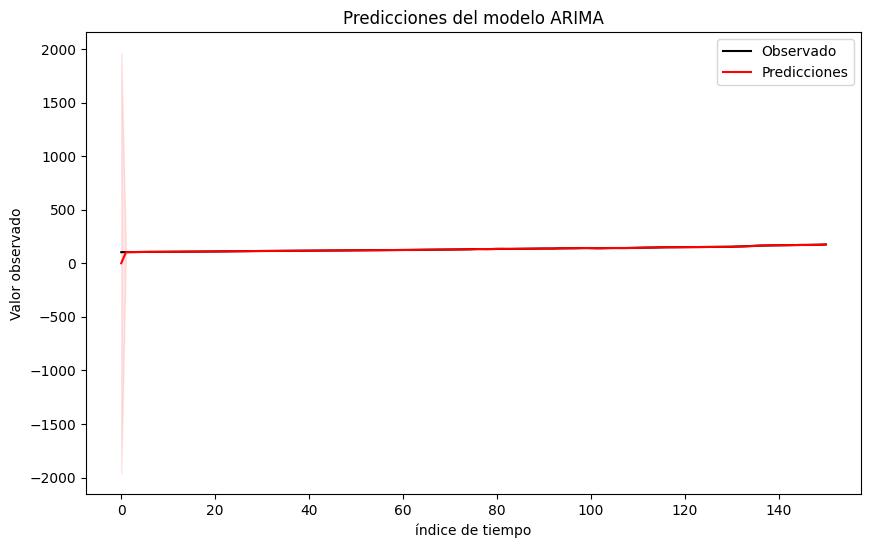

In [2]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(valores)

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1er orden')
ax1.plot(valores.diff())

ax2 = f.add_subplot(122)
plot_acf(valores.diff().dropna(), ax=ax2)
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(valores.dropna())
print('p_value: ', result[1])

result = adfuller(valores.diff().dropna())
print('p_value: ', result[1])

result = adfuller(valores.diff().diff().dropna())
print('p_value: ', result[1])

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1er orden')
ax1.plot(valores.diff())

ax2 = f.add_subplot(122)
plot_pacf(valores.diff().dropna(), ax=ax2)
plt.show()

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2do orden')
ax1.plot(valores.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(valores.diff().diff().dropna(), ax=ax2)
plt.show()

##ACF

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1er orden')
ax1.plot(valores.diff())

ax2 = f.add_subplot(122)
plot_acf(valores.diff().dropna(), ax=ax2)
plt.show()

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2do orden')
ax1.plot(valores.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(valores.diff().diff().dropna(), ax=ax2)
plt.show()



valores2 =np.array(valores)
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(valores, order=(1,1,1))
model =arima_model.fit()
print(model.summary())
# Obtener las predicciones

predicciones = model.get_prediction(dynamic=False)
predicciones_ci = predicciones.conf_int()
# Crear un rango de índices para graficar

#indice_tiempo = range(len(valores))

# Graficar las observaciones y las predicciones

plt.figure(figsize=(10,6))
plt.plot(valores, label='Observado', color ='black')
plt.plot(predicciones.predicted_mean, label='Predicciones', color ='red')

# Rellenar el área de confianza
plt.fill_between(predicciones_ci.index,
                 predicciones_ci.iloc[:, 0],
                 predicciones_ci.iloc[:, 1], color ='r',alpha=0.1)

# Ajustar el diseño del gráfico

plt.title('Predicciones del modelo ARIMA')
plt.xlabel('índice de tiempo')
plt.ylabel('Valor observado')
plt.legend()
plt.show()


c:\Users\tecnico_ine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


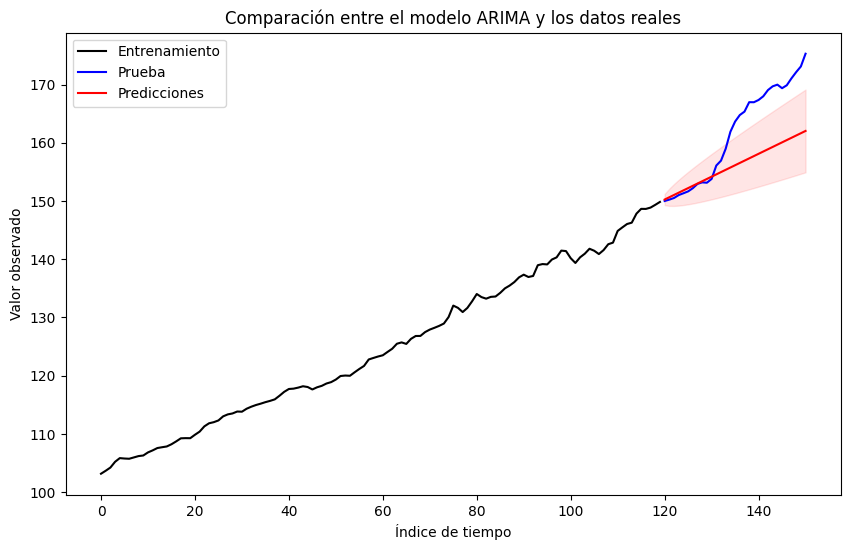

In [3]:
# Especificar el tamaño del conjunto de entrenamiento y prueba
tamanio_entrenamiento = int(len(valores) * 0.8)
conjunto_entrenamiento, conjunto_prueba = valores[:tamanio_entrenamiento], valores[tamanio_entrenamiento:]

# Ajustar el modelo ARIMA al conjunto de entrenamiento
arima_model = ARIMA(conjunto_entrenamiento, order=(1, 2, 1))
modelo_entrenado = arima_model.fit()

# Obtener las predicciones en el conjunto de prueba
predicciones = modelo_entrenado.get_forecast(steps=len(conjunto_prueba))
predicciones_ci = predicciones.conf_int()

# Crear un rango de índices para graficar
indice_tiempo_entrenamiento = np.arange(len(conjunto_entrenamiento))
indice_tiempo_prueba = np.arange(tamanio_entrenamiento, tamanio_entrenamiento + len(conjunto_prueba))

# Graficar las observaciones y las predicciones en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(indice_tiempo_entrenamiento, conjunto_entrenamiento, label='Entrenamiento', color='black')
plt.plot(indice_tiempo_prueba, conjunto_prueba, label='Prueba', color='blue')
plt.plot(indice_tiempo_prueba, predicciones.predicted_mean, label='Predicciones', color='red')

# Rellenar el área de confianza en el conjunto de prueba
plt.fill_between(indice_tiempo_prueba,
                 predicciones_ci.iloc[:, 0],
                 predicciones_ci.iloc[:, 1], color='r', alpha=0.1)

# Ajustar el diseño del gráfico
plt.title('Comparación entre el modelo ARIMA y los datos reales')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor observado')
plt.legend()
plt.show()

In [13]:
from IPython.display import display


pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

Text(0, 0.5, 'IPC')

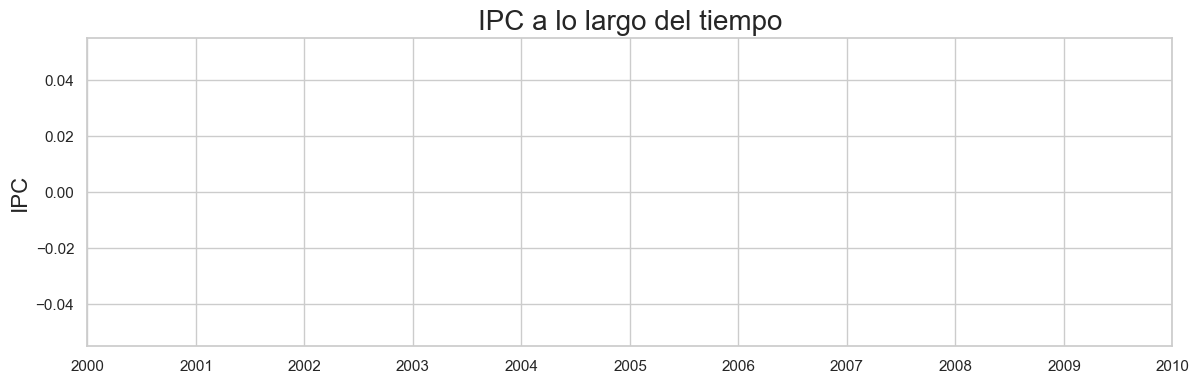

In [17]:
def parser(s):
    return pd.to_datetime(s, errors='coerce')  # 'coerce' manejará los errores y convertirá los valores no válidos a NaT

ipc = pd.read_excel(ruta, parse_dates=[3], index_col=3, skiprows=3, date_parser=parser)

# Elimina filas duplicadas basadas en el índice
ipc = ipc[~ipc.index.duplicated(keep='first')]

ipc = ipc.asfreq(pd.infer_freq(ipc.index))

start_date = datetime(2011, 4, 1)
end_date = datetime(2023, 10, 1)

lim_ipc = ipc[start_date:end_date]

plt.figure(figsize=(14,4))
plt.plot(lim_ipc)
plt.title('IPC a lo largo del tiempo', fontsize=20)
plt.ylabel('IPC', fontsize=16)